# Random Forest

A **Random Forest** is an ensemble machine learning algorithm commonly used for classification and regression tasks. It operates by constructing multiple decision trees during training and aggregating their predictions to improve accuracy and reduce overfitting.

## Key Features
1. **Ensemble Method**: Combines multiple decision trees to reduce variance and bias.
2. **Bagging**: Uses bootstrap aggregating to create subsets of the data for each tree.
3. **Feature Randomness**: Selects a random subset of features for each tree split, increasing diversity among the trees.
4. **Voting or Averaging**:
   - For classification: Uses majority voting.
   - For regression: Averages predictions from all trees.

## Benefits
- Handles both classification and regression tasks.
- Resistant to overfitting with proper parameter tuning.
- Performs well with large datasets and high-dimensional data.
- Can handle missing values and outliers effectively.

## Limitations
- Slower for large datasets compared to simpler models.
- Requires parameter tuning (e.g., number of trees, max depth) for optimal performance.
- Less interpretable compared to a single decision tree.

## Applications
- Fraud detection
- Risk assessment
- Medical diagnosis
- Predictive maintenance in manufacturing
- Marketing analysis

## Hyperparameters to Tune
1. **`n_estimators`**: Number of trees in the forest (more trees improve accuracy but increase computation time).
2. **`max_depth`**: Maximum depth of each tree to control overfitting.
3. **`min_samples_split`**: Minimum number of samples required to split a node.
4. **`min_samples_leaf`**: Minimum number of samples required in a leaf node.
5. **`max_features`**: Number of features considered at each split.



## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
)
import graphviz
from IPython.display import Image


In [2]:
# Constants
RSEED = 50
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


def visualize_tree(tree_model, feature_names, class_names, filename='tree'):
    """Visualize decision tree using graphviz."""
    try:
        dot_data = export_graphviz(
            tree_model,
            out_file=None,
            feature_names=feature_names,
            class_names=class_names,
            filled=True,
            rounded=True,
        )
        graph = graphviz.Source(dot_data)
        graph.render(filename, format='png', cleanup=True)
    except Exception as e:
        print(f"Warning: Could not generate tree visualization: {str(e)}")


def evaluate_model(predictions, probs, train_predictions, train_probs, test_labels, train_labels):
    """Evaluate model performance."""
    baseline = {
        'recall': recall_score(test_labels, [1] * len(test_labels)),
        'precision': precision_score(test_labels, [1] * len(test_labels)),
        'roc': 0.5,
    }

    results = {
        'recall': recall_score(test_labels, predictions),
        'precision': precision_score(test_labels, predictions),
        'roc': roc_auc_score(test_labels, probs),
    }

    train_results = {
        'recall': recall_score(train_labels, train_predictions),
        'precision': precision_score(train_labels, train_predictions),
        'roc': roc_auc_score(train_labels, train_probs),
    }

    print("\nEvaluation Metrics:")
    for metric in ['recall', 'precision', 'roc']:
        print(
            f"{metric.capitalize():>10} Baseline: {baseline[metric]:.3f} Test: {results[metric]:.3f} Train: {train_results[metric]:.3f}"
        )

    # Plot ROC curve
    fig, ax = plt.subplots(figsize=(8, 6))
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1] * len(test_labels))
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)
    ax.plot(base_fpr, base_tpr, 'b--', label='Baseline', alpha=0.8)
    ax.plot(model_fpr, model_tpr, 'r-', label='Model', alpha=0.8)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curves')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix'):
    """Plot confusion matrix."""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='.2f' if normalize else 'd',
        cmap='Blues',
        xticklabels=classes,
        yticklabels=classes
    )
    plt.title(title, pad=20)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


def preprocess_data(file_path):
    """Preprocess dataset for training and testing."""
    df = pd.read_csv(file_path).sample(1000, random_state=RSEED)
    df = df.select_dtypes('number')
    df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
    df = df[df['_RFHLTH'].isin([0, 1])].copy()
    df.rename(columns={'_RFHLTH': 'label'}, inplace=True)
    columns_to_drop = [
        'POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2',
        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'
    ]
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
    return df


def train_random_forest(train, train_labels):
    """Train a Random Forest model."""
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        n_jobs=-1,
        random_state=RSEED,
        verbose=1
    )
    rf_model.fit(train, train_labels)
    return rf_model


def visualize_random_forest_tree(best_model, train):
    """Export and visualize a tree from the Random Forest."""
    estimator = best_model.estimators_[1]
    dot_data = export_graphviz(
        estimator,
        #out_file=None,
        rounded=True,
        feature_names=train.columns,
        max_depth=8,
        class_names=['poverty', 'no poverty'],
        filled=True
    )
    graph = graphviz.Source(dot_data, format='png')
    graph.render('tree_from_optimized_forest', format='png', cleanup=True)
    return Image(filename='tree_from_optimized_forest.png')



    




Training decision tree...

Starting Real Dataset Example...
Training Random Forest model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished



Making predictions...


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished



Evaluation Metrics:
    Recall Baseline: 1.000 Test: 0.967 Train: 1.000
 Precision Baseline: 0.807 Test: 0.848 Train: 1.000
       Roc Baseline: 0.500 Test: 0.879 Train: 1.000


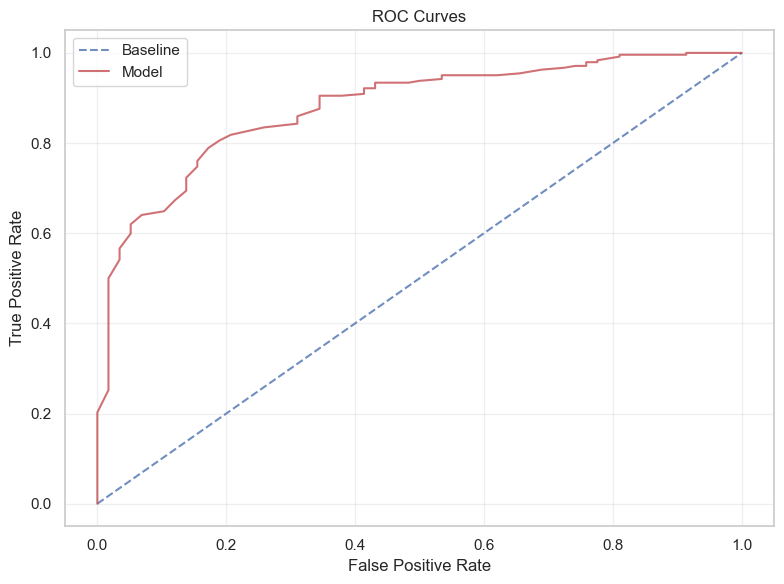


Generating confusion matrix...


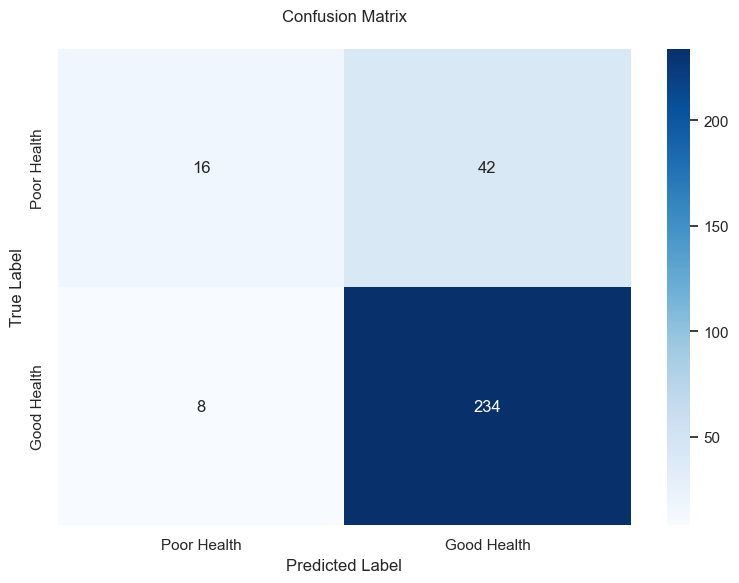


Top 10 Most Important Features:
      feature  importance
58   QLACTLM2    0.036972
305  _LMTACT1    0.020259
307  _LMTSCL1    0.020054
62   DIFFWALK    0.019915
42   DIABAGE2    0.017723
88   LMTJOIN3    0.017718
64   DIFFALON    0.015733
250   _INCOMG    0.015216
53    INCOME2    0.014969
249   _EDUCAG    0.014623


In [3]:
# 1. Simple Dataset Example
X = np.array([[2, 2], [2, 1], [2, 3], [1, 2], [1, 1], [3, 3]])
y = np.array([0, 1, 1, 1, 0, 1])

tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)
print("Training decision tree...")
visualize_tree(tree, ['x1', 'x2'], ['0', '1'], 'simple_tree')


print("\nStarting Real Dataset Example...")
file_path = 'c:/Users/NANAYAW/OneDrive/Documents/GitHub/FinalProject/supervised/RandomForest/2015.csv'
df = preprocess_data(file_path)

labels = df.pop('label').values
train, test, train_labels, test_labels = train_test_split(
    df, labels, stratify=labels, test_size=0.3, random_state=RSEED
)

train.fillna(train.mean(), inplace=True)
test.fillna(train.mean(), inplace=True)

print("Training Random Forest model...")
rf_model = train_random_forest(train, train_labels)

print("\nMaking predictions...")
train_predictions = rf_model.predict(train)
train_probs = rf_model.predict_proba(train)[:, 1]
test_predictions = rf_model.predict(test)
test_probs = rf_model.predict_proba(test)[:, 1]

evaluate_model(
    test_predictions, test_probs, train_predictions, train_probs, test_labels, train_labels
)

print("\nGenerating confusion matrix...")
cm = confusion_matrix(test_labels, test_predictions)
plot_confusion_matrix(cm, ['Poor Health', 'Good Health'])

feature_importance = pd.DataFrame({
    'feature': train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))







Visualizing a tree from the Random Forest...


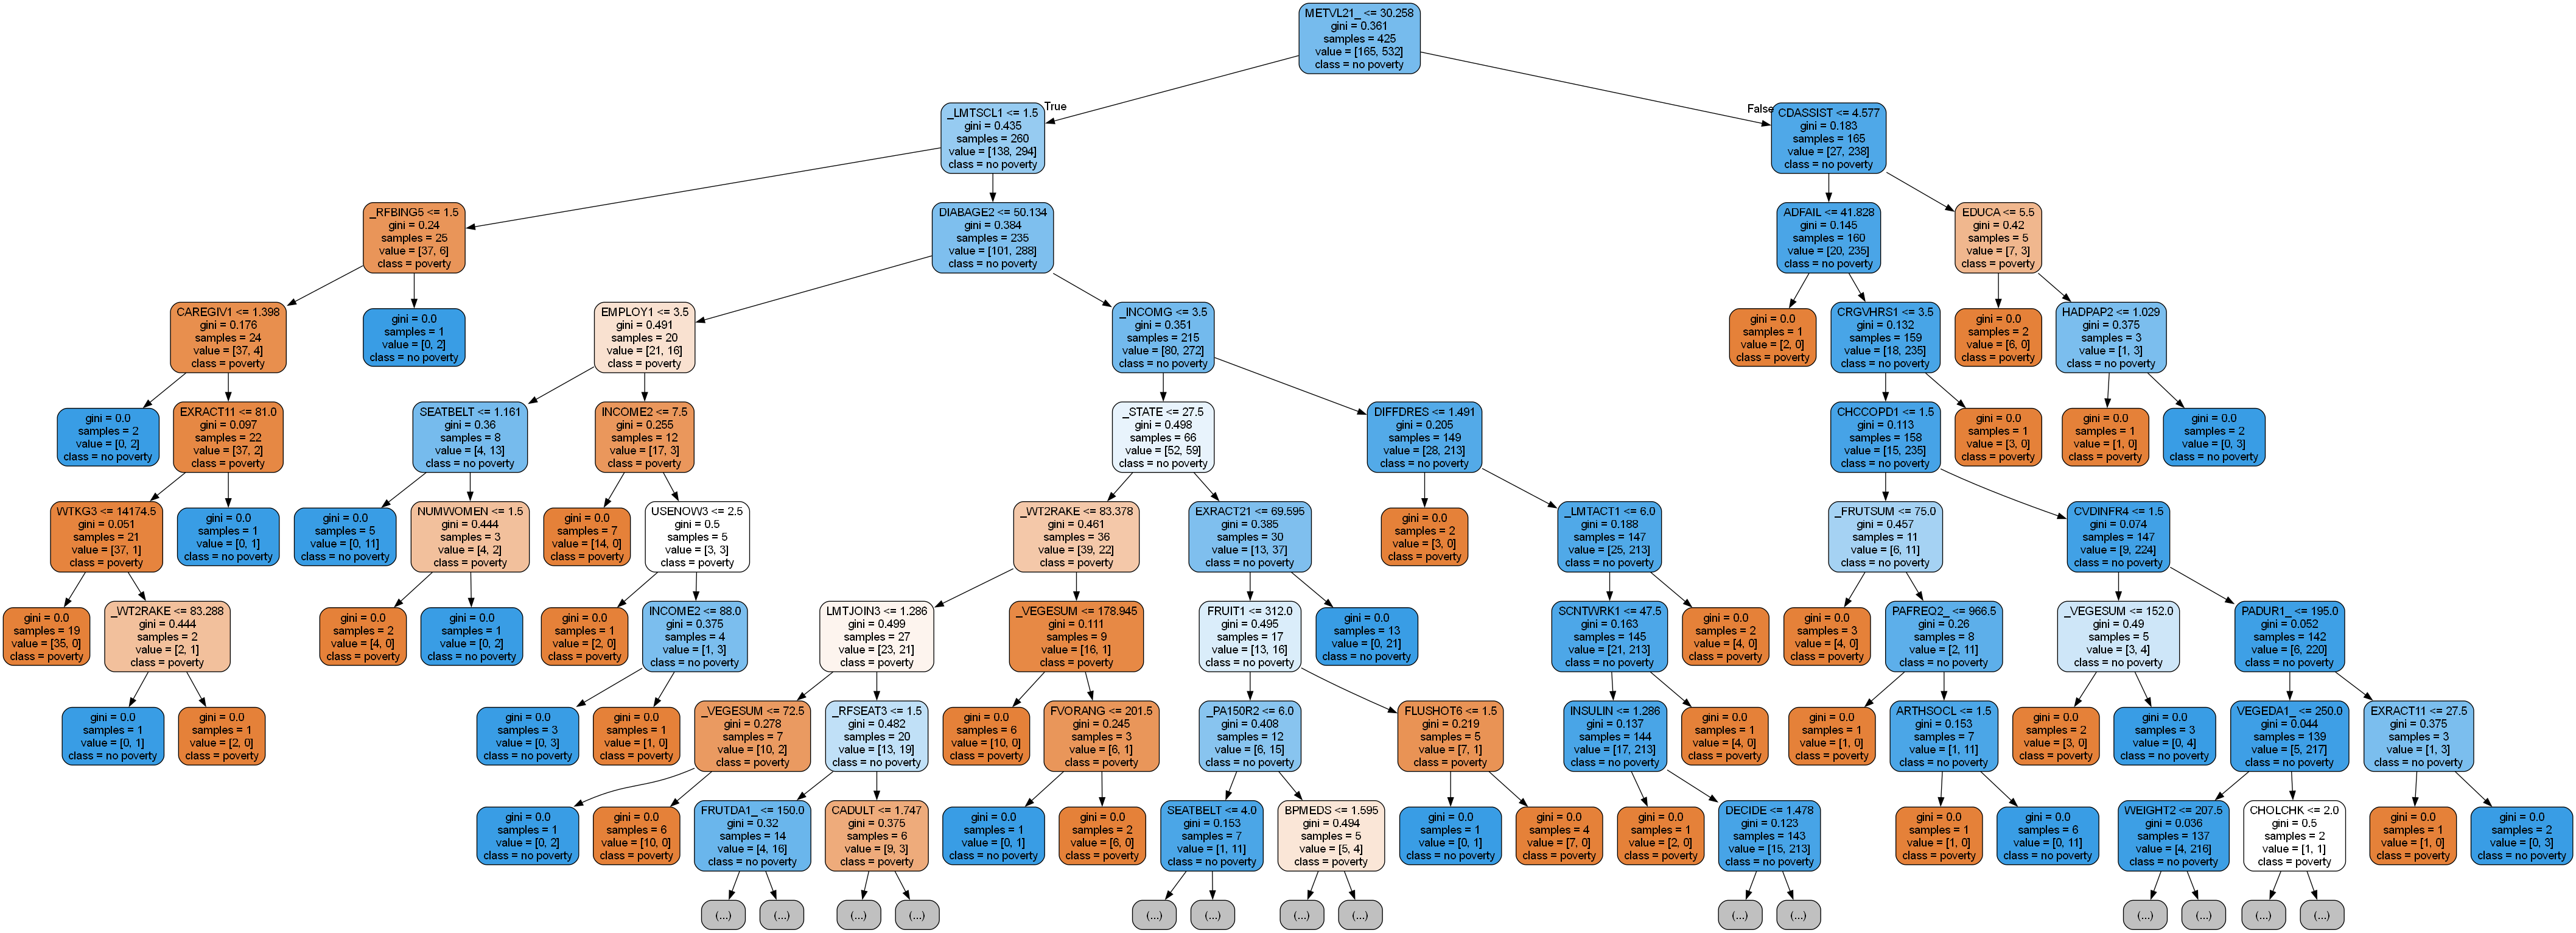

In [4]:
print("\nVisualizing a tree from the Random Forest...")
tree_image = visualize_random_forest_tree(rf_model, train)
from IPython.display import display
display(tree_image)

## Key Takeaways

### Random Subsets of Features
- During node splits, the Random Forest considers only a random subset of features, improving model robustness.

### Bias-Variance Tradeoff
- Machine learning involves balancing **high-complexity models** (prone to overfitting) and **simple models** (prone to underfitting).
- Random Forest effectively reduces the variance of a single decision tree while maintaining accurate learning on the training data, leading to improved predictions on the test set.

## Evaluation Metrics

- **Recall**: 
  - Baseline: 1.000  
  - Test: 0.967  
  - Train: 1.000  

- **Precision**: 
  - Baseline: 0.807  
  - Test: 0.848  
  - Train: 1.000  

- **ROC-AUC**: 
  - Baseline: 0.500  
  - Test: 0.879  
  - Train: 1.000  

These results highlight the Random Forest model's ability to generalize effectively, as evidenced by high performance on the testing dataset while maintaining robustness against overfitting.

